# Final Project

In [77]:
# Import statements
import os
import re
import nltk
import pandas as pd
import numpy as np
from afinn import Afinn
import matplotlib.pyplot as plt

In [78]:
def create_df(c):
    df = pd.DataFrame()
    divider = []
    names = []
    for f in os.listdir("tweets/%s" % c):
        try:
            dft = pd.read_csv("tweets/%s/%s" % (c, f))
            if len(divider) == 0:
                divider.append(len(dft) - 1)
            else:
                divider.append(len(dft) + divider[-1])
            df = pd.concat([df, dft])
            # parse output_name.csv string
            names.append(f[7:][:-4])
        except:
            print(f)
    return df, divider, names

In [79]:
categories = ["fast food", "airlines", "leagues", "colleges", "streaming platforms", "news", "tech giants", "celebrities"]

fast_food, ff_divider, ff_names = create_df(categories[0])
airlines, al_divider, al_names = create_df(categories[1])
leagues, lg_divider, lg_names = create_df(categories[2])
colleges, cl_divider, cl_names = create_df(categories[3])
streaming, st_divider, st_names = create_df(categories[4])
news, nw_divider, nw_names = create_df(categories[5])
tech, tg_divider, tg_names = create_df(categories[6])
celebs, cb_divider, cb_names = create_df(categories[7])


                   date    username               to  replies  retweets  \
0   2019-11-28 01:01:08  jimmyjohns              NaN        2         5   
1   2019-11-27 17:43:19  jimmyjohns              NaN        1         0   
2   2019-11-27 17:33:00  jimmyjohns         _amb333r        0         0   
3   2019-11-27 17:11:32  jimmyjohns      THYCROSSMAN        1         1   
4   2019-11-27 16:59:28  jimmyjohns    thatboyjoelll        1         2   
..                  ...         ...              ...      ...       ...   
95  2019-11-26 18:53:00  jimmyjohns   BoostCreditLLC        0         0   
96  2019-11-26 18:51:52  jimmyjohns  davidjdickerson        0         0   
97  2019-11-26 18:44:33  jimmyjohns     TheRosenOne1        0         0   
98  2019-11-26 16:51:24  jimmyjohns          shahcma        1         0   
99  2019-11-26 16:48:00  jimmyjohns        gisell_gg        0         0   

    favorites                                               text  geo  \
0          63  these parti

                   date   username               to  replies  retweets  \
0   2019-11-28 06:00:10  McDonalds      NiqueSaidIt        0         0   
1   2019-11-28 05:58:48  McDonalds       LeahRekati        0         0   
2   2019-11-28 05:57:25  McDonalds     ChloeDutton9        0         0   
3   2019-11-28 05:56:47  McDonalds      tanner_hake        0         0   
4   2019-11-28 05:56:21  McDonalds      tpmoneyTGOD        0         0   
..                  ...        ...              ...      ...       ...   
95  2019-11-28 01:57:55  McDonalds     chorizojonez        0         1   
96  2019-11-28 01:57:55  McDonalds  _brittneyharvey        0         0   
97  2019-11-28 01:21:05  McDonalds     Lauuren_1234        0         0   
98  2019-11-28 01:20:26  McDonalds  gonzaleztrisha6        0         0   
99  2019-11-28 01:17:08  McDonalds         tangurly        0         0   

    favorites                                               text  geo  \
0           0  You should treat yourse

                   date username               to  replies  retweets  \
0   2019-11-28 05:03:15   Wendys     amandahhh_13        0         0   
1   2019-11-28 05:02:12   Wendys       mac_ffball        0         0   
2   2019-11-28 05:00:29   Wendys       SGoldzilla        1         0   
3   2019-11-28 04:00:11   Wendys    JohnRSaratoga        0         0   
4   2019-11-28 03:37:18   Wendys  meredith_guziak        0         0   
..                  ...      ...              ...      ...       ...   
95  2019-11-26 16:04:55   Wendys  NorthsideBeauty        0         0   
96  2019-11-26 15:59:12   Wendys       TryingDave        1         0   
97  2019-11-26 15:49:56   Wendys    FullTimeMulti        2         0   
98  2019-11-26 15:36:37   Wendys       kristmarch        1         0   
99  2019-11-26 05:02:51   Wendys         Slushi__        1         0   

    favorites                                               text  geo  \
0           1  We're sorry to hear that! Please DM us the res.

                   date   username               to  replies  retweets  \
0   2019-11-28 02:36:00  Starbucks       bvdgalfifi        0         0   
1   2019-11-28 02:25:16  Starbucks   ruffdiggitydog        0         0   
2   2019-11-28 01:46:27  Starbucks      ddianasaurs        0         0   
3   2019-11-28 01:44:07  Starbucks    rehctudashley        0         0   
4   2019-11-28 01:43:38  Starbucks     ohhhthatsmo_        0         0   
..                  ...        ...              ...      ...       ...   
95  2019-11-27 18:06:40  Starbucks   ConnorBishoff1        0         0   
96  2019-11-27 17:45:23  Starbucks        AlaskaAir        2         1   
97  2019-11-27 17:40:04  Starbucks   ADarkConfidant        0         0   
98  2019-11-27 17:39:16  Starbucks  TheNerdyPumpkin        0         0   
99  2019-11-27 16:58:23  Starbucks   audacitytoLive        0         0   

    favorites                                               text  geo  \
0           0  It's everything you wan

                   date      username              to  replies  retweets  \
0   2019-11-28 22:33:08  SouthwestAir        vladimge        0         0   
1   2019-11-28 22:31:53  SouthwestAir    Mr_NewMexico        0         0   
2   2019-11-28 22:27:51  SouthwestAir  stickybritches        0         0   
3   2019-11-28 22:27:13  SouthwestAir       evanloetz        0         0   
4   2019-11-28 22:26:06  SouthwestAir      imthathoop        0         0   
..                  ...           ...             ...      ...       ...   
95  2019-11-28 17:48:10  SouthwestAir       b_i_n_o_y        2         0   
96  2019-11-28 17:39:33  SouthwestAir       b_i_n_o_y        1         0   
97  2019-11-28 17:36:42  SouthwestAir    SouthwestAir        1         0   
98  2019-11-28 17:34:49  SouthwestAir       claystorm        0         0   
99  2019-11-28 17:34:10  SouthwestAir          B2Bomr        0         0   

    favorites                                               text  geo  \
0           0 

                   date username               to  replies  retweets  \
0   2019-11-28 15:39:14  Ryanair        hanruth19        0         0   
1   2019-11-28 14:48:25  Ryanair  alvaromiguelima        0         0   
2   2019-11-28 14:22:37  Ryanair      baunz_music        2         0   
3   2019-11-28 13:27:31  Ryanair      DiegoReyesO        1         0   
4   2019-11-28 13:24:55  Ryanair           Dempz8        1         0   
..                  ...      ...              ...      ...       ...   
95  2019-11-26 12:18:46  Ryanair         AliNaji8        1         0   
96  2019-11-26 12:12:14  Ryanair       BreanneMHC        0         0   
97  2019-11-26 10:37:10  Ryanair       beckyallin        0         0   
98  2019-11-26 10:35:36  Ryanair              NaN       10         8   
99  2019-11-26 10:23:44  Ryanair       beckyallin        1         0   

    favorites                                               text  geo  \
0           0  Hi Hannah, I hope your father will get well so.

                   date username   to  replies  retweets  favorites  \
0   2019-11-28 15:27:09      MLB  NaN       27       268       1391   
1   2019-11-27 23:11:57      MLB  NaN      162        74        874   
2   2019-11-27 20:07:17      MLB  NaN        5        59        474   
3   2019-11-27 19:10:23      MLB  NaN       38        37        311   
4   2019-11-27 17:44:28      MLB  NaN       14        89        650   
..                  ...      ...  ...      ...       ...        ...   
95  2019-11-15 18:25:29      MLB  NaN       34       410       2302   
96  2019-11-15 18:06:14      MLB  NaN       23       588       3487   
97  2019-11-15 15:45:17      MLB  NaN       43       574       4330   
98  2019-11-15 04:00:09      MLB  NaN       41       426       2432   
99  2019-11-15 02:49:54      MLB  NaN       44       790       4294   

                                                 text  geo         mentions  \
0   We're especially thankful for baseball. #Thank...  NaN          

                   date username              to  replies  retweets  \
0   2019-11-28 13:00:00     WNBA             NaN        2        22   
1   2019-11-27 23:00:01     WNBA             NaN        1         9   
2   2019-11-27 20:59:51     WNBA             NaN       11        63   
3   2019-11-27 18:18:03     WNBA             NaN        1         3   
4   2019-11-27 16:07:31     WNBA      De11eDonne        1         5   
..                  ...      ...             ...      ...       ...   
95  2019-11-15 21:34:11     WNBA  wnbachicagosky        0         2   
96  2019-11-15 19:52:14     WNBA             NaN        1         8   
97  2019-11-15 19:43:14     WNBA             NaN        0         2   
98  2019-11-15 15:43:05     WNBA             NaN        1        31   
99  2019-11-15 14:27:49     WNBA             NaN       29       161   

    favorites                                               text  geo  \
0         148                  #HappyThanksgiving from the #WNBA  NaN   
1

                   date username   to  replies  retweets  favorites  \
0   2019-11-15 13:15:55      IPL  NaN       83       563       3889   
1   2019-11-15 08:20:26      IPL  NaN       34       149       2207   
2   2019-11-14 12:58:52      IPL  NaN       30       192       2586   
3   2019-11-14 11:25:07      IPL  NaN       57       266       2783   
4   2019-11-13 12:55:16      IPL  NaN       94       553       6947   
..                  ...      ...  ...      ...       ...        ...   
95  2019-05-12 08:23:53      IPL  NaN       14       156       1786   
96  2019-05-12 06:36:49      IPL  NaN       11        25        389   
97  2019-05-12 06:00:01      IPL  NaN        8        63        756   
98  2019-05-12 04:30:00      IPL  NaN        0        23        315   
99  2019-05-12 03:01:00      IPL  NaN        4        35        548   

                                                 text  geo  \
0    ALERT : VIVO IPL 2020 Player Contract extensi...  NaN   
1   NEWS : @siddhesshla

                   date username             to  replies  retweets  favorites  \
0   2019-11-28 00:00:00     NCAA            NaN        0         6         30   
1   2019-11-27 20:00:00     NCAA            NaN        3         3         77   
2   2019-11-27 15:54:25     NCAA  UAPBLionsRoar        0        10         54   
3   2019-11-27 00:00:00     NCAA            NaN        6        13        110   
4   2019-11-26 16:56:41     NCAA            NaN       11        14         49   
..                  ...      ...            ...      ...       ...        ...   
95  2019-10-05 00:00:00     NCAA            NaN        6         7         14   
96  2019-10-04 19:00:00     NCAA            NaN        4         8         81   
97  2019-10-04 13:04:31     NCAA   EmersonLions        2        25        122   
98  2019-10-04 00:00:00     NCAA            NaN        2         3         13   
99  2019-10-03 16:00:03     NCAA            NaN        0         4         21   

                           

                   date    username   to  replies  retweets  favorites  \
0   2019-11-28 16:47:01  UCBerkeley  NaN        0         1          5   
1   2019-11-28 00:20:01  UCBerkeley  NaN        1         1         17   
2   2019-11-27 17:53:01  UCBerkeley  NaN        0         1          6   
3   2019-11-26 19:27:01  UCBerkeley  NaN        0        28         63   
4   2019-11-26 19:14:25  UCBerkeley  NaN        0         8         30   
..                  ...         ...  ...      ...       ...        ...   
95  2019-10-16 19:06:49  UCBerkeley  NaN        0         2         11   
96  2019-10-16 17:46:02  UCBerkeley  NaN        0        15         29   
97  2019-10-16 16:35:34  UCBerkeley  NaN        3        11         77   
98  2019-10-16 00:02:45  UCBerkeley  NaN        0         1         10   
99  2019-10-15 22:54:00  UCBerkeley  NaN        2        11         22   

                                                 text  geo          mentions  \
0   Comedian @MazJobrani writes

                   date  username               to  replies  retweets  \
0   2019-11-28 14:01:02  Stanford              NaN        2        12   
1   2019-11-28 03:30:27  Stanford              NaN        1        26   
2   2019-11-28 02:00:24  Stanford              NaN        1        10   
3   2019-11-27 21:41:26  Stanford              NaN        0         6   
4   2019-11-26 17:40:04  Stanford              NaN        2        10   
..                  ...       ...              ...      ...       ...   
95  2019-10-16 05:00:05  Stanford              NaN        4        19   
96  2019-10-15 23:29:00  Stanford              NaN        2        12   
97  2019-10-15 21:01:08  Stanford  pointe_magazine        0         6   
98  2019-10-15 20:34:31  Stanford              NaN        3        30   
99  2019-10-15 03:00:09  Stanford              NaN        1         9   

    favorites                                               text  geo  \
0          33  Stanford biologists are using rare 

                   date   username   to  replies  retweets  favorites  \
0   2019-11-28 14:00:25  Princeton  NaN        2         9         76   
1   2019-11-27 17:01:14  Princeton  NaN        0         3         34   
2   2019-11-27 13:01:16  Princeton  NaN        0         3         22   
3   2019-11-27 02:00:33  Princeton  NaN        0         1         11   
4   2019-11-26 23:45:04  Princeton  NaN        0         3          7   
..                  ...        ...  ...      ...       ...        ...   
95  2019-11-18 19:36:33  Princeton  NaN        1         3          8   
96  2019-11-18 19:36:32  Princeton  NaN        1         0          4   
97  2019-11-18 19:17:18  Princeton  NaN        1         1          5   
98  2019-11-18 17:42:52  Princeton  NaN        1         9         28   
99  2019-11-18 13:01:11  Princeton  NaN        0        10         62   

                                                 text  geo  \
0               Happy Thanksgiving from #PrincetonU!   NaN   

                   date    username         to  replies  retweets  favorites  \
0   2019-11-28 17:17:44  PrimeVideo        HBO        0         0          5   
1   2019-11-28 17:16:34  PrimeVideo        NaN        3         1         16   
2   2019-11-28 17:16:25  PrimeVideo        NaN        7         7         74   
3   2019-11-27 17:57:12  PrimeVideo  Boxcar312        2         0          2   
4   2019-11-27 17:05:11  PrimeVideo        NaN       12         5         37   
..                  ...         ...        ...      ...       ...        ...   
95  2019-11-22 03:12:43  PrimeVideo        NaN        0         0          2   
96  2019-11-22 03:04:52  PrimeVideo        NaN        8         5         13   
97  2019-11-22 02:46:31  PrimeVideo        NaN        6         7         65   
98  2019-11-22 02:28:30  PrimeVideo        NaN        5         4         32   
99  2019-11-22 02:10:45  PrimeVideo        NaN        8        14         62   

                                       

                   date    username   to  replies  retweets  favorites  \
0   2019-11-28 13:27:00  AppleMusic  NaN        6        20        116   
1   2019-11-28 03:27:48  AppleMusic  NaN        5        10         95   
2   2019-11-28 02:27:33  AppleMusic  NaN        9        15        147   
3   2019-11-27 21:33:38  AppleMusic  NaN        7        16         79   
4   2019-11-27 19:03:32  AppleMusic  NaN        9        85        550   
..                  ...         ...  ...      ...       ...        ...   
95  2019-11-05 01:09:55  AppleMusic  NaN       12        68        502   
96  2019-11-04 19:55:55  AppleMusic  NaN        3        93        451   
97  2019-11-04 19:17:28  AppleMusic  NaN        4        20        137   
98  2019-11-03 22:05:58  AppleMusic  NaN       12        74        475   
99  2019-11-03 21:08:23  AppleMusic  NaN        5        21        132   

                                                 text  geo  \
0   Celebrate the holiday with the #ThanksgivingD

                   date        username   to  replies  retweets  favorites  \
0   2019-11-28 14:04:41  washingtonpost  NaN        1         7         12   
1   2019-11-28 13:35:21  washingtonpost  NaN       50        99        380   
2   2019-11-28 13:05:10  washingtonpost  NaN       16        15         63   
3   2019-11-28 12:33:25  washingtonpost  NaN       34        29         77   
4   2019-11-28 12:02:24  washingtonpost  NaN        9        16         65   
..                  ...             ...  ...      ...       ...        ...   
95  2019-11-27 16:16:56  washingtonpost  NaN       15        37         66   
96  2019-11-27 16:14:37  washingtonpost  NaN       14        61        109   
97  2019-11-27 16:09:55  washingtonpost  NaN       13       110        111   
98  2019-11-27 16:09:35  washingtonpost  NaN        8        61         82   
99  2019-11-27 16:06:01  washingtonpost  NaN        7        44         52   

                                                 text  geo ment

                   date username   to  replies  retweets  favorites  \
0   2019-11-28 13:20:05  nytimes  NaN        0         7          7   
1   2019-11-28 12:59:04  nytimes  NaN       35        47         90   
2   2019-11-28 12:40:02  nytimes  NaN        9        43        148   
3   2019-11-28 12:20:03  nytimes  NaN        5        36        186   
4   2019-11-28 12:00:16  nytimes  NaN        9        33        106   
..                  ...      ...  ...      ...       ...        ...   
95  2019-11-27 06:20:05  nytimes  NaN       15        97        474   
96  2019-11-27 06:00:02  nytimes  NaN       99       274        475   
97  2019-11-27 05:40:04  nytimes  NaN       10        69        214   
98  2019-11-27 05:20:06  nytimes  NaN      221       316        789   
99  2019-11-27 04:40:05  nytimes  NaN        9        21        111   

                                                 text  geo mentions hashtags  \
0   China vowed retaliation after President Trump ...  NaN      NaN

                   date username  to  replies  retweets  favorites  \
0   2019-11-28 13:45:03      WSJ NaN        0         4         19   
1   2019-11-28 13:30:09      WSJ NaN        2         5         14   
2   2019-11-28 13:15:05      WSJ NaN        5         3         24   
3   2019-11-28 13:00:11      WSJ NaN        2         5         28   
4   2019-11-28 12:45:05      WSJ NaN        7        20         44   
..                  ...      ...  ..      ...       ...        ...   
95  2019-11-27 09:46:33      WSJ NaN       44        23         35   
96  2019-11-27 09:30:04      WSJ NaN       29         8         32   
97  2019-11-27 09:15:05      WSJ NaN        3        12         52   
98  2019-11-27 09:00:08      WSJ NaN        5        43         57   
99  2019-11-27 08:30:12      WSJ NaN        5         6         31   

                                                 text  geo mentions hashtags  \
0   San Diego’s immigration court has dismissed mo...  NaN      NaN      NaN   

                   date username               to  replies  retweets  \
0   2019-11-28 11:33:00      IBM       lingfei_wu        0         0   
1   2019-11-28 11:31:00      IBM    prinzadelbart        0         0   
2   2019-11-28 11:16:30      IBM          SEArndt        0         0   
3   2019-11-28 11:12:33      IBM           leoraw        0         0   
4   2019-11-28 11:04:44      IBM    PrinceXMiraii        0         1   
..                  ...      ...              ...      ...       ...   
95  2019-11-04 17:33:00      IBM    AnuragShinde9        0         0   
96  2019-11-04 17:03:00      IBM  JohanSjareltjen        0         0   
97  2019-11-04 17:02:34      IBM       cascholten        0         0   
98  2019-11-04 17:01:47      IBM      marvamorris        0         0   
99  2019-11-04 17:01:00      IBM      JyotiDodhia        0         0   

    favorites                                               text  geo  \
0           0                                                 

                   date  username   to  replies  retweets  favorites  \
0   2019-11-27 18:00:00  Snapchat  NaN       30       559       3358   
1   2019-11-26 18:00:00  Snapchat  NaN        8        40        279   
2   2019-11-25 18:05:40  Snapchat  NaN       20        49        314   
3   2019-11-23 18:00:00  Snapchat  NaN       15        32        253   
4   2019-11-21 17:00:01  Snapchat  NaN       53       115        740   
..                  ...       ...  ...      ...       ...        ...   
95  2016-07-06 16:00:05  Snapchat  NaN       36       448        655   
96  2016-04-17 18:57:09  Snapchat  NaN       22        43        227   
97  2016-03-29 16:20:10  Snapchat  NaN       48       301       1183   
98  2016-03-29 16:02:02  Snapchat  NaN       34       365        461   
99  2016-03-11 20:01:09  Snapchat  NaN       13        13        115   

                                                 text  geo  mentions  \
0   The one where they turn into @Bitmoji. #RealFr...  NaN  @Bi

                   date username             to  replies  retweets  favorites  \
0   2019-11-28 16:58:41  TheRock    UVAFootball       26        73        936   
1   2019-11-28 01:59:49  TheRock   AshleyRoboto      222      1169      19238   
2   2019-11-28 01:52:34  TheRock            NaN       95       502       5806   
3   2019-11-27 19:25:01  TheRock        extratv       86       349       4628   
4   2019-11-27 19:23:32  TheRock  ColliderVideo       27       142       1775   
..                  ...      ...            ...      ...       ...        ...   
95  2019-10-27 17:37:57  TheRock    JerryLawler       22        96       1313   
96  2019-10-26 23:25:58  TheRock            NaN      396       612      13760   
97  2019-10-22 15:52:36  TheRock            NaN      208       429       6821   
98  2019-10-21 06:13:53  TheRock    LFAfighting       79       300       3520   
99  2019-10-20 18:43:54  TheRock            NaN       70       653      11105   

                           

                   date    username   to  replies  retweets  favorites  \
0   2019-11-19 23:55:32  amyschumer  NaN       21        12        132   
1   2019-11-13 01:57:03  amyschumer  NaN       23        52        227   
2   2019-11-13 00:01:28  amyschumer  NaN        7         3         60   
3   2019-11-11 01:50:19  amyschumer  NaN      337       171       3697   
4   2019-11-05 22:28:03  amyschumer  NaN       10         8        106   
..                  ...         ...  ...      ...       ...        ...   
95  2018-08-31 23:13:15  amyschumer  NaN       25        20        150   
96  2018-08-28 22:05:23  amyschumer  NaN       45        15        157   
97  2018-08-28 21:04:04  amyschumer  NaN       14         5         87   
98  2018-08-28 19:57:11  amyschumer  NaN        6         6         65   
99  2018-08-28 19:56:28  amyschumer  NaN      191      1658       2929   

                                                 text  geo  \
0   Jerry Seinfeld ep is up!! Link at @3girls1kei

                   date username               to  replies  retweets  \
0   2019-11-27 18:48:18    lizzo       lozzawayne       34        76   
1   2019-11-27 18:44:45    lizzo  Joebles05225704       26        60   
2   2019-11-27 18:38:12    lizzo       Eric_Cha93      264       275   
3   2019-11-27 18:33:44    lizzo   AndrewJustin00      152       240   
4   2019-11-27 18:30:23    lizzo              NaN      625      5919   
..                  ...      ...              ...      ...       ...   
95  2019-11-04 10:31:25    lizzo     mezzosophano      116      2936   
96  2019-11-04 10:05:55    lizzo   TRINArockstarr        8        16   
97  2019-11-03 19:39:27    lizzo     BunnyEarsWeb       50       441   
98  2019-11-03 17:53:56    lizzo       LizzoDaily      365      4915   
99  2019-11-02 04:30:44    lizzo              NaN       67      1678   

    favorites                                               text  geo  \
0        2181                                           Love y

In [102]:
stopwords = nltk.corpus.stopwords.words("english")

# Clean tweets for sentiment analysis
def get_clean_words(words):
    def _isnum(w):
        try:
            int(w)
            return True
        except ValueError:
            return False
        
    # Set words to lowercase and remove them if they are stop words
    words = [w.lower() for w in words if w.lower() not in stopwords]

    # Remove punctuation
    words = [w.replace('(', '') for w in words]
    words = [w.replace(')', '') for w in words]
    words = [w.replace('?', '') for w in words]
    words = [w.replace(',', '') for w in words]
    words = [w.replace('.', '') for w in words]
    words = [w.replace('"', '') for w in words]
    words = [w.replace('!', '') for w in words]
    words = [w.replace(':', '') for w in words]

    # Remove numbers
    words = [w for w in words if not _isnum(w)]
    
    # Remove links
    words = [w for w in words if 'http' not in w]
        
    # Remove hashtags
    words = [w for w in words if not w.startswith("#")]
    
    # Remove mentions
    words = [w for w in words if not w.startswith("@")]
    
    # Only keep words with more than one character
    words = [w for w in words if len(w) > 1]

    return words

In [103]:
def clean_tweets(tweets):
    categories = len(tweets)
    print(categories)
    all_tweets = []
    for c in range(categories):
        t_new = []
        count = 0
        for t in tweets[c]:
            try:
                w = t.split()
                w = get_clean_words(w)
                tc = " ".join(w)
                t_new.append(tc)
            except:
                count += 1
        print(count, len(t_new))
        all_tweets.append(t_new)
    return all_tweets

In [104]:
def split_tweets(category_text, divider):
    category_tweets = []
    for d in divider:
        category_acct = []
        for i, tweet in enumerate(list(category_text)):
            if i <= d:
                category_acct.append(tweet)
            else:
                break
        category_tweets.append(category_acct)
    return category_tweets
    
            
ff_tweets = split_tweets(fast_food['text'], ff_divider)    
al_tweets = split_tweets(airlines['text'], al_divider)  
lg_tweets = split_tweets(leagues['text'], lg_divider)
cl_tweets = split_tweets(colleges['text'], cl_divider)
st_tweets = split_tweets(streaming['text'], st_divider)
nw_tweets = split_tweets(news['text'], nw_divider)
tg_tweets = split_tweets(tech['text'], tg_divider)
cb_tweets = split_tweets(celebs['text'], cb_divider)

ff_clean = clean_tweets(ff_tweets)
al_clean = clean_tweets(al_tweets)
lg_clean = clean_tweets(lg_tweets)
cl_clean = clean_tweets(cl_tweets)
st_clean = clean_tweets(st_tweets)
nw_clean = clean_tweets(nw_tweets)
tg_clean = clean_tweets(tg_tweets)
cb_clean = clean_tweets(cb_tweets)

10
2327 7673
2593 17407
2594 27406
2601 37399
2602 47398
2683 57317
2762 67238
2762 77238
3015 86985
3110 96890
10
4 9996
7 19993
502 29498
502 39498
502 49498
503 59497
505 69495
505 79495
505 89495
505 91795
10
136 9864
171 19829
173 29827
331 39669
472 49528
473 54375
474 64374
476 74372
476 84372
476 90970
10
15 9985
16 19984
89 29911
94 39155
108 41885
238 51223
238 59272
238 66553
248 73228
264 83212
10
81 9919
239 19761
659 29341
662 34812
1206 44268
1226 52745
2134 61837
2186 71371
2186 81371
2226 84857
10
0 10000
0 20000
0 30000
0 40000
0 50000
76 59924
113 69887
113 79887
114 89886
140 99860
10
6 8060
6 12567
25 14906
30 15045
30 18676
30 21676
35 30352
66 32021
68 42019
166 51921
10
63 8854
247 18001
475 27773
483 30619
495 35452
497 45450
510 46630
516 56624
579 65478
581 69945


In [47]:
afinn = Afinn()

def get_affinity_scores(tweets):
    scores = []
    for t in tweets:
        if (len(t) > 0):
            scores.append(afinn.score(t) / len(t))
    return scores

In [48]:
ff_affin = get_affinity_scores(ff_clean)
al_affin = get_affinity_scores(al_clean)
lg_affin = get_affinity_scores(lg_clean)
cl_affin = get_affinity_scores(cl_clean)
st_affin = get_affinity_scores(st_clean)
nw_affin = get_affinity_scores(nw_clean)
tg_affin = get_affinity_scores(tg_clean)
cb_affin = get_affinity_scores(cb_clean)

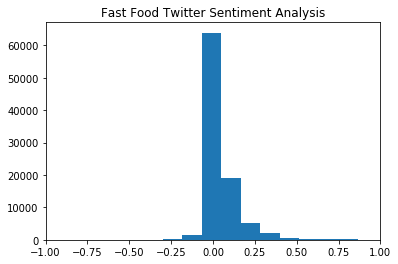

In [49]:
plt.hist(ff_affin, bins = 20)
plt.xlim([-1, 1])
plt.title("Fast Food Twitter Sentiment Analysis")
plt.show()

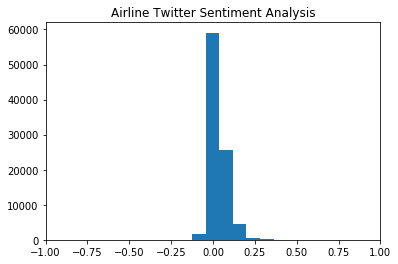

In [50]:
plt.hist(al_affin, bins = 20)
plt.xlim([-1, 1])
plt.title("Airline Twitter Sentiment Analysis")
plt.show()

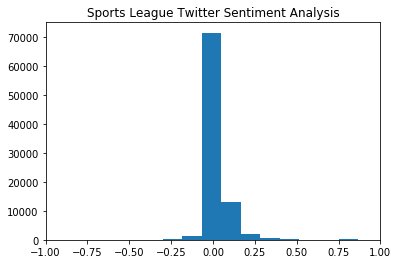

In [51]:
plt.hist(lg_affin, bins = 20)
plt.xlim([-1, 1])
plt.title("Sports League Twitter Sentiment Analysis")
plt.show()

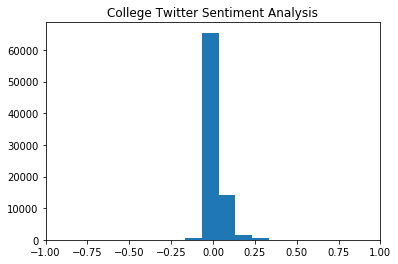

In [52]:
plt.hist(cl_affin, bins = 20)
plt.xlim([-1, 1])
plt.title("College Twitter Sentiment Analysis")
plt.show()

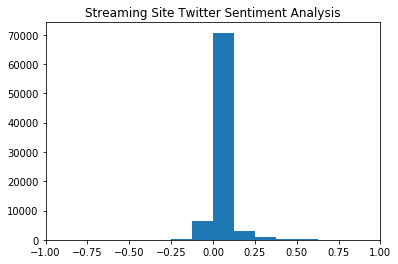

In [53]:
plt.hist(st_affin, bins = 20)
plt.xlim([-1, 1])
plt.title("Streaming Site Twitter Sentiment Analysis")
plt.show()

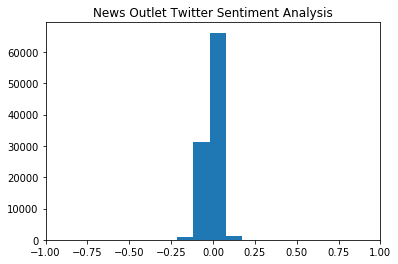

In [54]:
plt.hist(nw_affin, bins = 20)
plt.xlim([-1, 1])
plt.title("News Outlet Twitter Sentiment Analysis")
plt.show()

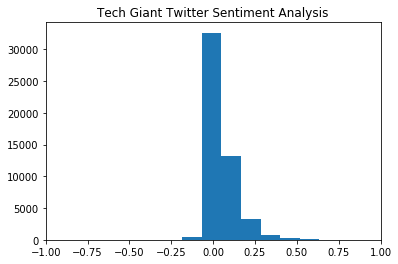

In [55]:
plt.hist(tg_affin, bins = 20)
plt.xlim([-1, 1])
plt.title("Tech Giant Twitter Sentiment Analysis")
plt.show()

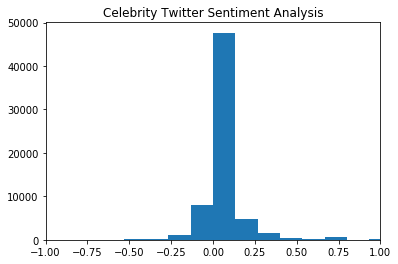

In [56]:
plt.hist(cb_affin, bins = 20)
plt.xlim([-1, 1])
plt.title("Celebrity Twitter Sentiment Analysis")
plt.show()

In [57]:
def affin_by_acct(tweets, divider):
    acct = []
    start = 0
    for x in range(len(divider)):
        acct.append(np.mean(get_affinity_scores(tweets[start:divider[x]])))
        start = divider[x] + 1
    return acct

In [58]:
ff_acct = affin_by_acct(ff_clean, ff_divider)
al_acct = affin_by_acct(al_clean, al_divider)
lg_acct = affin_by_acct(lg_clean, lg_divider)
cl_acct = affin_by_acct(cl_clean, cl_divider)
st_acct = affin_by_acct(st_clean, st_divider)
nw_acct = affin_by_acct(nw_clean, nw_divider)
tg_acct = affin_by_acct(tg_clean, tg_divider)
cb_acct = affin_by_acct(cb_clean, cb_divider)

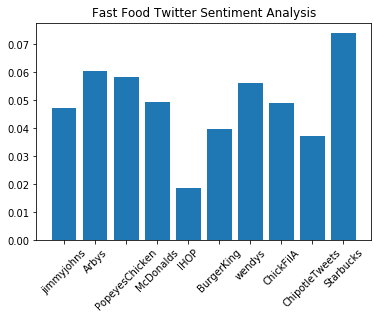

In [59]:
plt.bar(ff_names, ff_acct)
plt.title("Fast Food Twitter Sentiment Analysis")
plt.xticks(rotation=45)
plt.show()

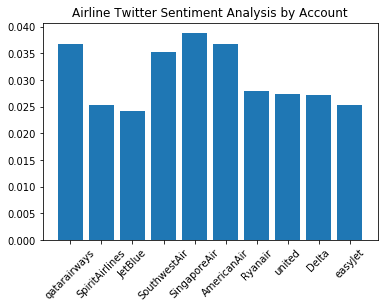

In [60]:
plt.bar(al_names, al_acct)
plt.title("Airline Twitter Sentiment Analysis by Account")
plt.xticks(rotation=45)
plt.show()

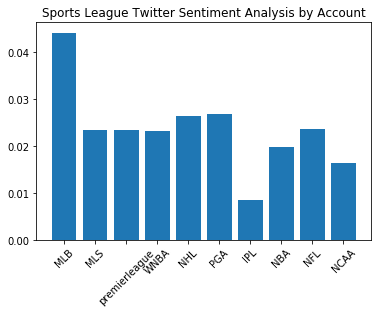

In [61]:
plt.bar(lg_names, lg_acct)
plt.title("Sports League Twitter Sentiment Analysis by Account")
plt.xticks(rotation=45)
plt.show()

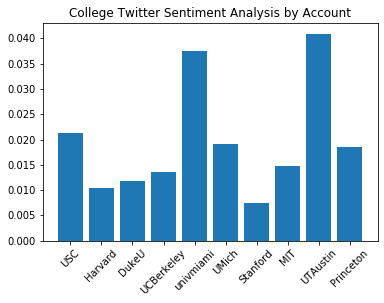

In [62]:
plt.bar(cl_names, cl_acct)
plt.title("College Twitter Sentiment Analysis by Account")
plt.xticks(rotation=45)
plt.show()

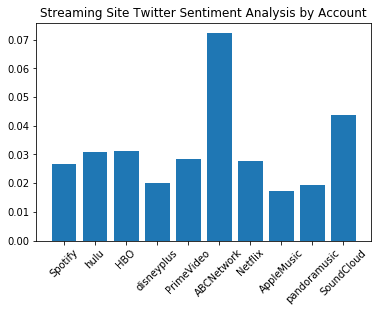

In [63]:
plt.bar(st_names, st_acct)
plt.title("Streaming Site Twitter Sentiment Analysis by Account")
plt.xticks(rotation=45)
plt.show()

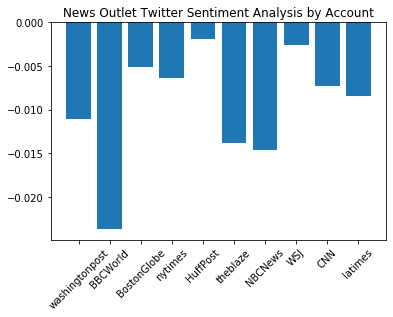

In [64]:
plt.bar(nw_names, nw_acct)
plt.title("News Outlet Twitter Sentiment Analysis by Account")
plt.xticks(rotation=45)
plt.show()

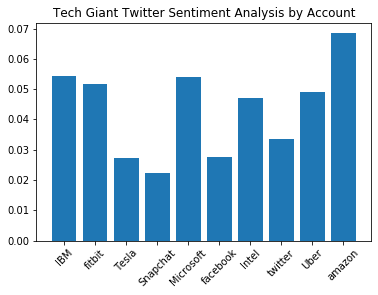

In [65]:
plt.bar(tg_names, tg_acct)
plt.title("Tech Giant Twitter Sentiment Analysis by Account")
plt.xticks(rotation=45)
plt.show()

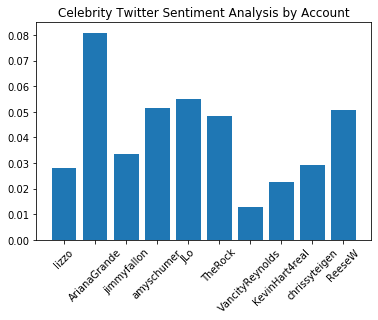

In [66]:
plt.bar(cb_names, cb_acct)
plt.title("Celebrity Twitter Sentiment Analysis by Account")
plt.xticks(rotation=45)
plt.show()

In [125]:
# print(ff_clean[0][0:100], ff_clean[1][0:100])
import numpy as np
# ff_clean_new = [f.split() for ff in ff_clean for f in ff]
# ff_clean_new = [w for t in ff_clean_new for w in t]
# print(ff_clean_new[0:100])
#print(tg_clean[0][0:100])
print(np.shape(ff_clean_new))

(4130361,)


parties getting wild careful tonight meet freaky fast® order button life got whole lot easier i'm really sorry hold today give store call see what's up love love i'm sorry let store know right away ma


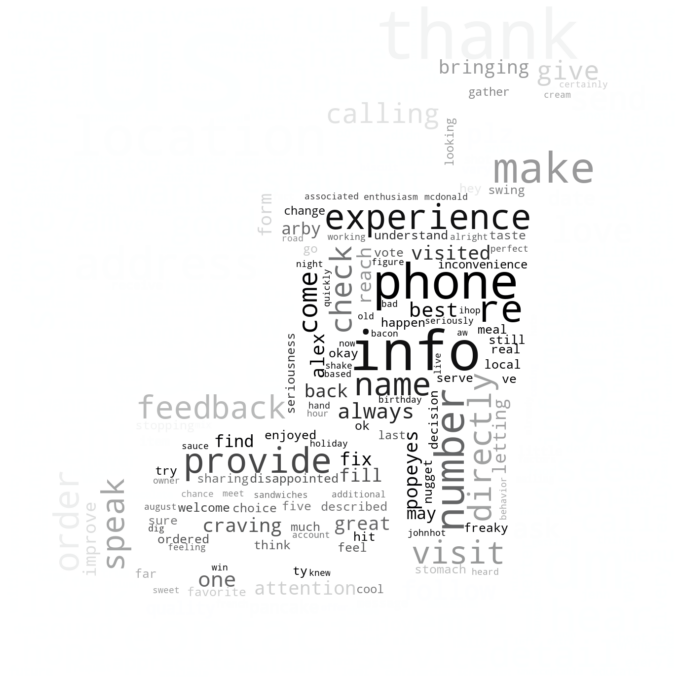

In [130]:
import wordcloud
import matplotlib.pylab as plt
from PIL import Image

char_mask = np.array(Image.open("fastfood2.png"))    
image_colors = wordcloud.ImageColorGenerator(char_mask)

plt.figure(figsize=(12, 18))
text = ' '.join([' '.join(ff_clean[i]) for i in range(len(ff_clean))])
print(text[:200])
wc = wordcloud.WordCloud(background_color="white", max_words=400, max_font_size=40, width=400, height=400, mask=char_mask, collocations=False, random_state=1)
wc.generate(text)
# to recolour the image
plt.imshow(wc.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis("off")
plt.show()